In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from arch import arch_model

dataSP500 = pd.read_csv('./CSV/df_sp500.csv')

# Check the first few rows of the data
dataSP500.head()

,Date,Close,High,Low,Open,Volume
0,2020-02-12,3379.449951,3381.469971,3369.719971,3370.500000,3930910000
1,2020-02-13,3373.939941,3385.090088,3360.520020,3365.899902,3500890000
2,2020-02-14,3380.159912,3380.689941,3366.149902,3378.080078,3419700000
3,2020-02-18,3370.290039,3375.010010,3355.610107,3369.040039,3750400000
4,2020-02-19,3386.149902,3393.520020,3378.830078,3380.389893,3614200000


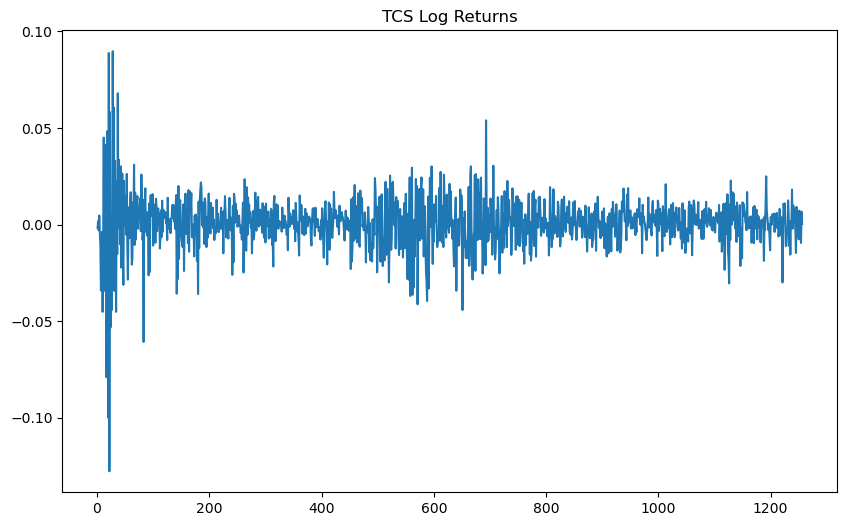

In [3]:
# Calculate daily log returns
dataSP500['Log_Returns'] = np.log(dataSP500['Close'] / dataSP500['Close'].shift(1))

# Drop missing values (first row will be NaN due to shift)
dataSP500 = dataSP500.dropna()

# Plot log returns to visualize the data
dataSP500['Log_Returns'].plot(title='TCS Log Returns', figsize=(10, 6))
plt.show()

In [4]:
# Define the EGARCH model (1,1)
model = arch_model(dataSP500['Log_Returns'], vol='EGARCH', p=1, q=1)

# Fit the model
egarch_fit = model.fit(disp='off')

# Print the model summary
print(egarch_fit.summary())

                     Constant Mean - EGARCH Model Results                     
Dep. Variable:            Log_Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:                3949.83
Distribution:                  Normal   AIC:                          -7891.66
Method:            Maximum Likelihood   BIC:                          -7871.11
                                        No. Observations:                 1256
Date:                Thu, Feb 13 2025   Df Residuals:                     1255
Time:                        14:04:55   Df Model:                            1
                                  Mean Model                                 
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         7.2682e-04  4.351e-04      1.671  9.480e-02 

/opt/anaconda3/lib/python3.12/site-packages/arch/univariate/base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001824. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [5]:
# Forecast volatility for the next 30 days
forecast_horizon = 30
volatility_forecast = egarch_fit.forecast(horizon=forecast_horizon,method="bootstrap")

# Extract the forecasted volatility (standard deviation) from the model
forecasted_volatility = np.sqrt(volatility_forecast.variance.values[-1, :])

# Display the forecasted volatility
print("Forecasted Volatility for the next 30 days:")
print(forecasted_volatility)

Forecasted Volatility for the next 30 days:
[0.0084307  0.00850539 0.00858964 0.00863336 0.00868626 0.00876765
 0.00881113 0.00889183 0.00899432 0.00904483 0.00912785 0.00917684
 0.00922019 0.00924546 0.00931697 0.00938662 0.00948318 0.00952492
 0.00952595 0.00958815 0.00959235 0.00963042 0.00966014 0.00969617
 0.0097291  0.00978287 0.00984239 0.00988909 0.00993405 0.00999783]


In [6]:
dataSP500

,Date,Close,High,Low,Open,Volume,Log_Returns
1,2020-02-13,3373.939941,3385.090088,3360.520020,3365.899902,3500890000,-0.001632
2,2020-02-14,3380.159912,3380.689941,3366.149902,3378.080078,3419700000,0.001842
3,2020-02-18,3370.290039,3375.010010,3355.610107,3369.040039,3750400000,-0.002924
4,2020-02-19,3386.149902,3393.520020,3378.830078,3380.389893,3614200000,0.004695
5,2020-02-20,3373.229980,3389.149902,3341.020020,3380.449951,4019180000,-0.003823
...,...,...,...,...,...,...,...
1252,2025-02-05,6061.479980,6062.859863,6007.060059,6020.450195,4756250000,0.003901
1253,2025-02-06,6083.569824,6084.029785,6046.830078,6072.220215,4847120000,0.003638
1254,2025-02-07,6025.990234,6101.279785,6019.959961,6083.129883,4766900000,-0.009510
1255,2025-02-10,6066.439941,6073.379883,6044.839844,6046.399902,4458760000,0.006690


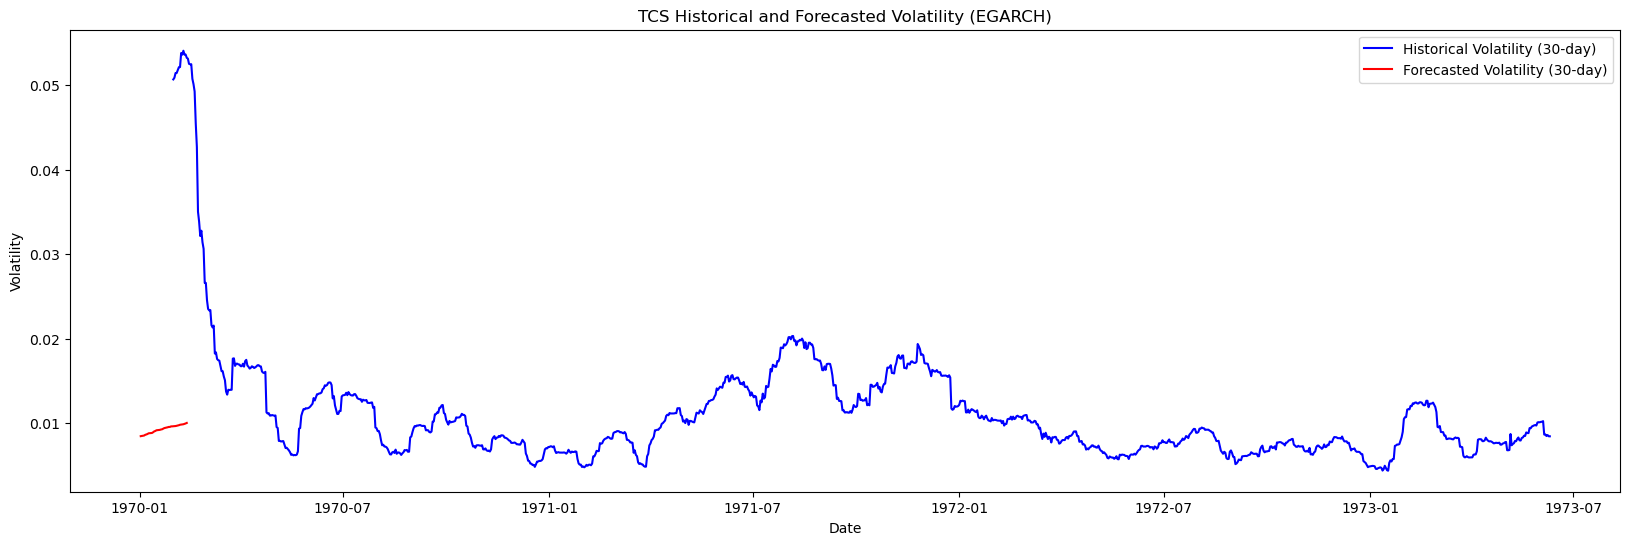

In [ ]:
# Plot the historical and forecasted volatility
plt.figure(figsize=(20, 6))

# Historical volatility (rolling 30-day standard deviation of log returns)
historical_volatility = dataSP500['Log_Returns'].rolling(window=30).std()

# Plot historical volatility
plt.plot(historical_volatility, label='Historical Volatility (30-day)', color='blue')

# Plot forecasted volatility (append to the end of historical data)
future_dates = pd.date_range(dataSP500.index[-1], periods=forecast_horizon+1, freq='B')[1:]
forecast_volatility_series = pd.Series(forecasted_volatility, index=future_dates)

# Plot forecasted volatility
plt.plot(forecast_volatility_series, label='Forecasted Volatility (30-day)', color='red')

# Add labels and legend
plt.title('S&P 500 Volatility Forecast')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show()

In [8]:
# Import required libraries
import pandas as pd
import numpy as np
import plotly.graph_objects as go
from datetime import datetime, timedelta

# Calculate daily log returns
dataSP500['Log_Returns'] = np.log(dataSP500['Close'] / dataSP500['Close'].shift(1))

# Drop missing values (first row will be NaN due to shift)
dataSP500 = dataSP500.dropna()

# Convert Date column to datetime if it's not already
dataSP500['Date'] = pd.to_datetime(dataSP500['Date'])

# Set Date as index
dataSP500.set_index('Date', inplace=True)

# Calculate historical volatility (30-day rolling standard deviation)
historical_volatility = dataSP500['Log_Returns'].rolling(window=30).std()

# Create future dates for forecast
last_date = dataSP500.index[-1]
future_dates = pd.date_range(start=last_date, periods=forecast_horizon+1, freq='B')[1:]

# Create the plot
fig = go.Figure()

# Plot historical volatility
fig.add_trace(
    go.Scatter(
        x=historical_volatility.index,
        y=historical_volatility,
        name='Historical Volatility (30-day)',
        line=dict(color='blue')
    )
)

# Plot forecasted volatility
fig.add_trace(
    go.Scatter(
        x=future_dates,
        y=forecasted_volatility,
        name='Forecasted Volatility',
        line=dict(color='red')
    )
)

# Update layout
fig.update_layout(
    title='S&P 500 Volatility Forecast',
    xaxis_title='Date',
    yaxis_title='Volatility',
    showlegend=True,
    template='plotly_white'
)

fig.show()

/var/folders/k9/dhbh01w55y9gq6g3kxfbr9400000gn/T/ipykernel_80638/3246927143.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataSP500['Date'] = pd.to_datetime(dataSP500['Date'])
